In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
model = load_model('cats_and_dogs_small_2.h5')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
image_path = '/home/tangli/Documents/deeplearningbook/deeplearningwithpython/smallerdata/test/cats/cat.1700.jpg'

In [6]:
from keras.preprocessing import image
import numpy as np

In [7]:
img = image.load_img(image_path, target_size=(150,150))

In [8]:
img_tensor = image.img_to_array(img)

In [9]:
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255

In [10]:
print(img_tensor.shape)

(1, 150, 150, 3)


In [12]:
import matplotlib.pyplot as plt

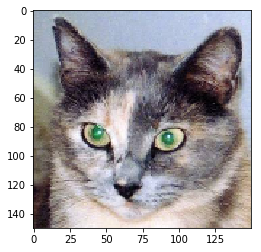

In [13]:
plt.imshow(img_tensor[0])
plt.show()

In [16]:
from keras import models

In [14]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [17]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [18]:
activations = activation_model.predict(img_tensor)

In [19]:
first_layer_activation = activations[0]

In [20]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


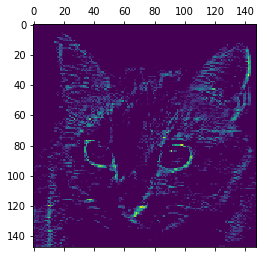

In [21]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

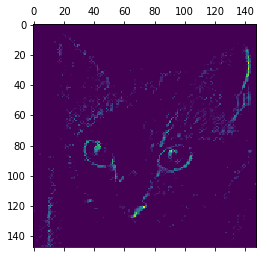

In [22]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/home/tangli/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


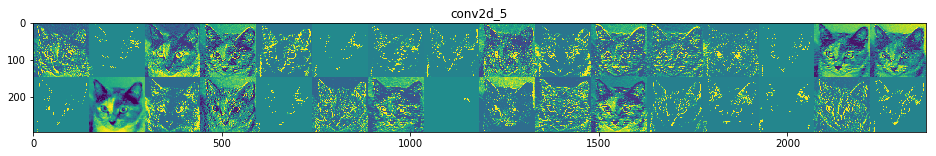

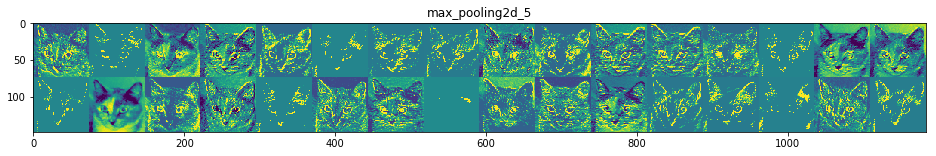

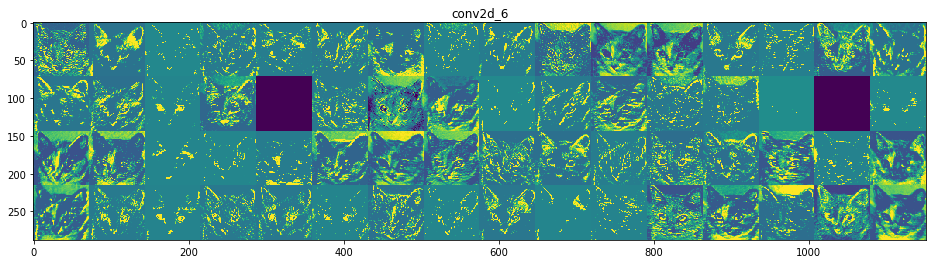

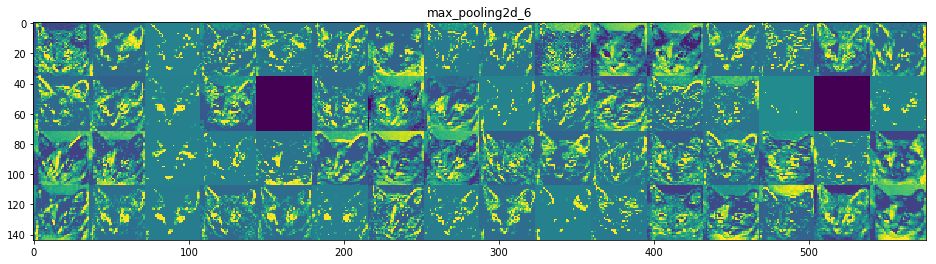

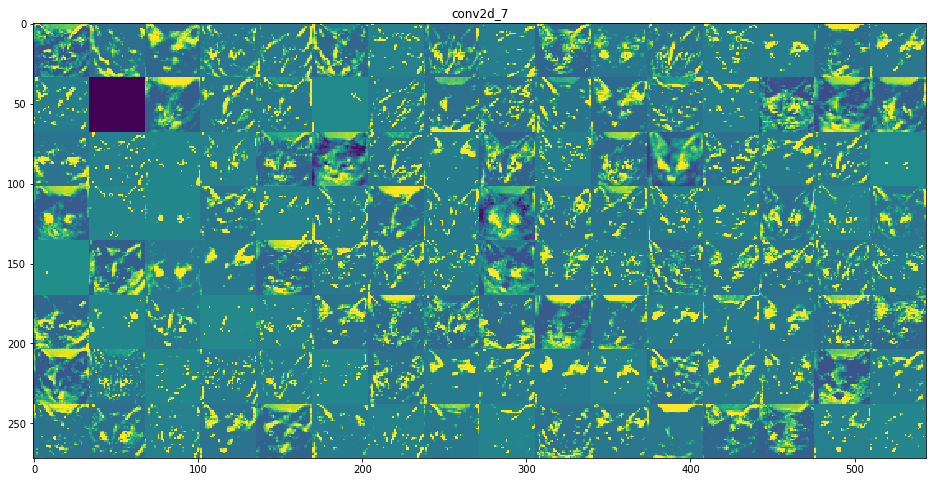

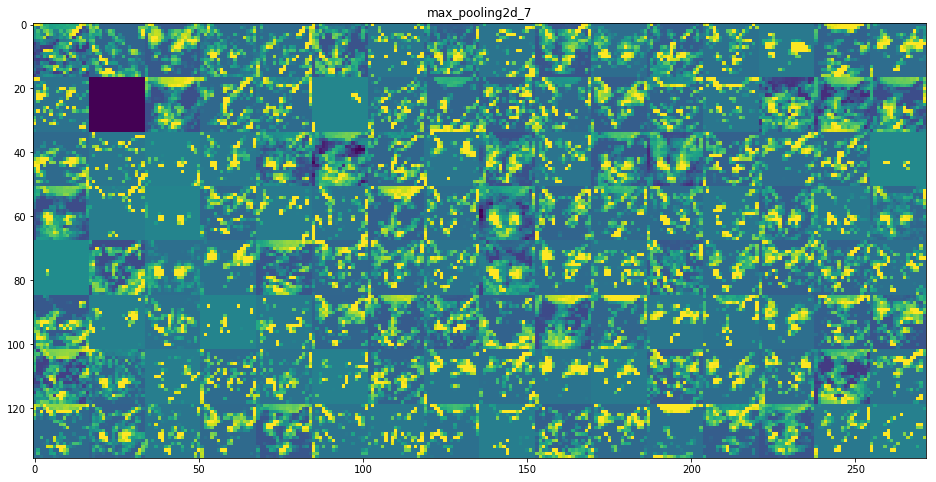

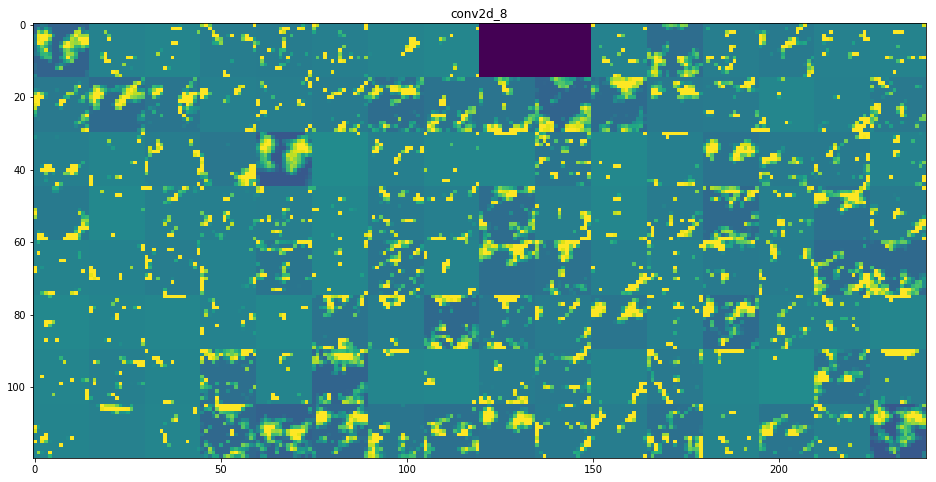

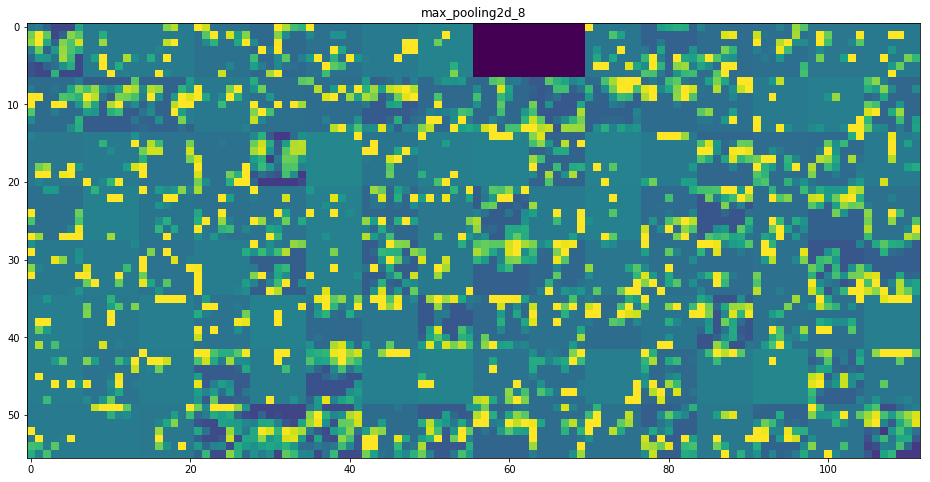

In [23]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [24]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet',
              include_top=False)


In [25]:
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [26]:
grads = K.gradients(loss, model.input)[0]

In [27]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)